Dataset Link: https://archive.ics.uci.edu/dataset/45/heart+disease

### Cleaning and Preprocessing the data

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random

**Variables Table**

age: integer feature

sex: categorical feature

cp: categorical feature

trestbps: integer feature representing the resting blood pressure (on admission to the hospital) in mm Hg

chol: integer feature representing the serum cholestoral in mg/dl

fbs: categorical feature representing the fasting blood sugar > 120 mg/dl

restecg: categorical feature

thalach: integer feature representing the maximum heart rate achieved

exang: categorical feature representing the exercise induced angina

oldpeak: integer feature representing the ST depression induced by exercise relative to rest

slope: categorical feature

ca: integer feature representing the number of major vessels (0-3) colored by flourosopy

thal: categorical feature

num: integer target representing a diagnosis of heart disease

In [ ]:
cleve_attributes = ['age', 'sex', 'cp', 'trestbps',
                    'chol', 'fbs', 'restecg', 'thalach',
                    'exang', 'oldpeak', 'slope', 'ca',
                    'thal', 'num']

raw_data = open('processed.cleveland.data', 'r')

cleve_data = []

for line in raw_data:
  cleve_data.append(line.split(','))

cleve_dataset = pd.DataFrame(cleve_data, columns=cleve_attributes)

cleve_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0\n
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2\n
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1\n
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0\n
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1\n
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2\n
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3\n
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1\n


In [ ]:
def make_float(num):
  num = num.replace('?', '')
  try:
    num = float(num)
  except ValueError:
    num = None
  return num

def make_int(num):
  num = num.replace('\n', '')
  num = int(num)
  return num

for i in range(len(cleve_attributes) - 1):
  cleve_dataset[cleve_attributes[i]] = cleve_dataset[cleve_attributes[i]].apply(make_float)

cleve_dataset['num'] = cleve_dataset['num'].apply(make_int)

cleve_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
cleve_dataset = cleve_dataset.dropna()
cleve_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


### Creating Training and Testing CSVs

In [ ]:
int_list = [i for i in range(1, len(cleve_dataset) - 1)]

random.shuffle(int_list)

train_int_list = int_list[:(len(int_list) - 1)//2]
test_int_list = int_list[(len(int_list) - 1)//2:]

train_list = []
test_list = []

for i in train_int_list:
  train_list.append(cleve_data[i])

for j in test_int_list:
  test_list.append(cleve_data[j])

In [ ]:
train_list = pd.DataFrame(train_list, columns=cleve_attributes)
test_list = pd.DataFrame(test_list, columns=cleve_attributes)

for i in range(len(cleve_attributes) - 1):
  train_list[cleve_attributes[i]] = train_list[cleve_attributes[i]].apply(make_float)

for j in range(len(cleve_attributes) - 1):
  test_list[cleve_attributes[j]] = test_list[cleve_attributes[j]].apply(make_float)

train_list['num'] = train_list['num'].apply(make_int)
test_list['num'] = test_list['num'].apply(make_int)

train_list = train_list.dropna()
test_list = test_list.dropna()

train_list.to_csv('Cleveland Training.csv')
test_list.to_csv('Cleveland Testing.csv')

train_list.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3
1,44.0,0.0,3.0,108.0,141.0,0.0,0.0,175.0,0.0,0.6,2.0,0.0,3.0,0
2,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,2
3,61.0,1.0,3.0,150.0,243.0,1.0,0.0,137.0,1.0,1.0,2.0,0.0,3.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


### Featurize

In [ ]:
# changed the 2s,3s, and 4s to 1s to improve model's accuracy
#    since the values greater than or equal to 1 all indicate
#    heart disease presence

def featurize(df):
  df['num'] = [1 if x > 0 else 0 for x in df['num']]
  return df

train_list = featurize(train_list)
test_list = featurize(test_list)

train_list.head()
test_list.head()

<ipython-input-202-ab4cfca8c468>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num'] = [1 if x > 0 else 0 for x in df['num']]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,1
1,44.0,0.0,3.0,108.0,141.0,0.0,0.0,175.0,0.0,0.6,2.0,0.0,3.0,0
2,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,1
3,61.0,1.0,3.0,150.0,243.0,1.0,0.0,137.0,1.0,1.0,2.0,0.0,3.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,1
1,65.0,1.0,4.0,110.0,248.0,0.0,2.0,158.0,0.0,0.6,1.0,2.0,6.0,1
2,59.0,1.0,1.0,178.0,270.0,0.0,2.0,145.0,0.0,4.2,3.0,0.0,7.0,0
3,69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0,0
4,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,1


### Feature and Label

In [ ]:
train_features = train_list[['age', 'sex', 'cp', 'trestbps',
                    'chol', 'fbs', 'restecg', 'thalach',
                    'exang', 'oldpeak', 'slope', 'ca',
                    'thal', 'num']]

train_labels = train_list['num']

train_features.head()
train_labels.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,1
1,44.0,0.0,3.0,108.0,141.0,0.0,0.0,175.0,0.0,0.6,2.0,0.0,3.0,0
2,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,1
3,61.0,1.0,3.0,150.0,243.0,1.0,0.0,137.0,1.0,1.0,2.0,0.0,3.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


,num
0,1
1,0
2,1
3,0
4,0


### Defining and training Classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


lr_classifier = LogisticRegression(solver='lbfgs',max_iter=10000)
mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                               hidden_layer_sizes=(13, 2), random_state=11,max_iter=10000)


# train our models
lr_classifier.fit(train_features, train_labels)
mlp_classifier.fit(train_features, train_labels)

LogisticRegression(max_iter=10000)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(13, 2), max_iter=10000,
              random_state=11, solver='lbfgs')

### Evaluating our models' performance

In [ ]:
from sklearn.metrics import accuracy_score

#load test data
test_df = pd.read_csv("Cleveland Testing.csv")

test_df = featurize(test_df)

# Extract the input features
test_inputs = test_df[['age', 'sex', 'cp', 'trestbps',
                    'chol', 'fbs', 'restecg', 'thalach',
                    'exang', 'oldpeak', 'slope', 'ca',
                    'thal', 'num']]

y_actual = test_df["num"]

# predict using logistic regression model
y_predicted_lr = lr_classifier.predict(test_inputs)
lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)

# predict using logistic regression model
y_predicted_mlp = mlp_classifier.predict(test_inputs)
mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)

print (f"Accuracy of the Logistic Classifier = {lr_accuracy_score}")
print (f"Accuracy of the MLP Classifier = {mlp_accuracy_score}")

Accuracy of the Logistic Classifier = 1.0
Accuracy of the MLP Classifier = 0.5306122448979592


* Talk about differences in accuracy and the causes of it *

## Fairness

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_actual, y_predicted_lr))
print(classification_report(y_actual, y_predicted_mlp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        69

    accuracy                           1.00       147
   macro avg       1.00      1.00      1.00       147
weighted avg       1.00      1.00      1.00       147

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        78
           1       0.00      0.00      0.00        69

    accuracy                           0.53       147
   macro avg       0.27      0.50      0.35       147
weighted avg       0.28      0.53      0.37       147



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* paragraph discussing scores *

## Correlations and Visualizations

finding correlation between each factor and the absence/presence of heart dis

In [ ]:
from scipy.stats import pearsonr

for column in test_inputs.columns:
  if column != 'num':
    correlation = pearsonr(test_inputs[column], test_inputs['num'])
    print(f'Correlation for {column} = {correlation[0]:.2f}')

Correlation for age = 0.30
Correlation for sex = 0.26
Correlation for cp = 0.48
Correlation for trestbps = 0.16
Correlation for chol = 0.16
Correlation for fbs = 0.14
Correlation for restecg = 0.09
Correlation for thalach = -0.53
Correlation for exang = 0.53
Correlation for oldpeak = 0.50
Correlation for slope = 0.46
Correlation for ca = 0.50
Correlation for thal = 0.57


Investigate top 4 correlations

<Axes: xlabel='num', ylabel='thalach'>

Text(0.5, 0, 'Diagnosis of Heart Disease')

Text(0, 0.5, 'thalach (max heart rate)')

Text(0.5, 1.0, 'Box Plot of Heart Disease vs. Max Heart Rate')

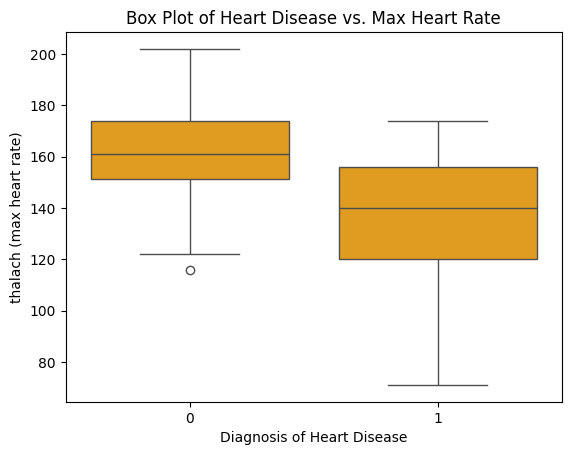

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=y_actual, y='thalach', data=test_df, color = 'orange')
plt.xlabel('Diagnosis of Heart Disease')
plt.ylabel('thalach (max heart rate)')
plt.title('Box Plot of Heart Disease vs. Max Heart Rate')
plt.show()

In [ ]:
ex_disease_absent = {0.0: 0, 1.0: 0}
ex_disease_present = {0.0: 0, 1.0: 0}

target_list = test_df['num'].to_list()
ex_list = test_df['exang'].to_list()

for i in range(len(target_list)):
  if target_list[i] == 0:
    if ex_list[i] == 0.0:
      ex_disease_absent[0.0] += 1
    elif ex_list[i] == 1.0:
      ex_disease_absent[1.0] += 1

  elif target_list[i] == 1:
    if ex_list[i] == 0.0:
      ex_disease_present[0.0] += 1
    elif ex_list[i] == 1.0:
      ex_disease_present[1.0] += 1

<BarContainer object of 2 artists>

Text(0.5, 0, 'exang (0-1)')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bar Plot of Exercise Induced Angina for Heart Disease Absence')

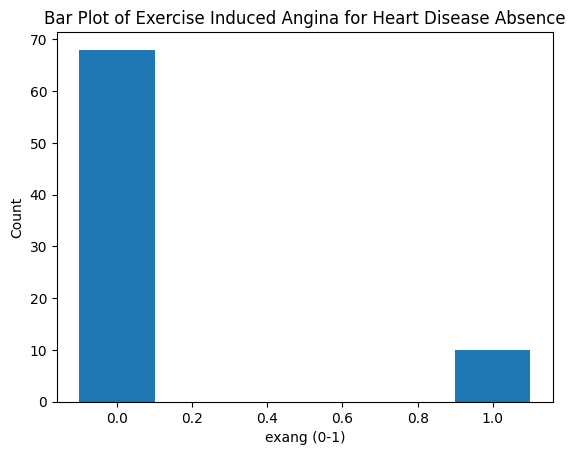

In [ ]:
plt.bar(ex_disease_absent.keys(), ex_disease_absent.values(), width = 0.2)
plt.xlabel('exang (0-1)')
plt.ylabel('Count')
plt.title('Bar Plot of Exercise Induced Angina for Heart Disease Absence')
plt.show()

<BarContainer object of 2 artists>

Text(0.5, 0, 'exang (0-1)')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bar Plot of Exercise Induced Angina for Heart Disease Presence')

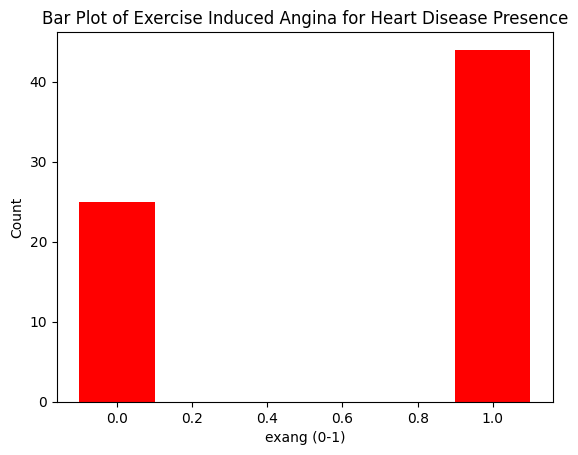

In [ ]:
plt.bar(ex_disease_present.keys(), ex_disease_present.values(), width = 0.2,
        color = 'red')
plt.xlabel('exang (0-1)')
plt.ylabel('Count')
plt.title('Bar Plot of Exercise Induced Angina for Heart Disease Presence')
plt.show()

<Axes: xlabel='num', ylabel='ca'>

Text(0.5, 0, 'Diagnosis of Heart Disease')

Text(0, 0.5, 'ca (0-3) ')

Text(0.5, 1.0, 'Box Plot of Heart Disease vs. Number of Major Vessels')

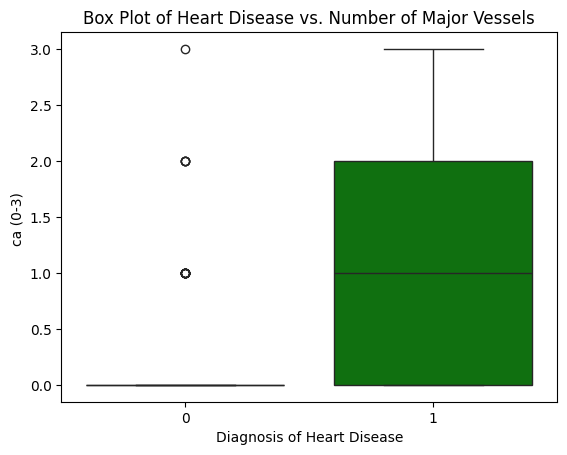

In [ ]:
sns.boxplot(x=y_actual, y='ca', data=test_df, color = 'green')
plt.xlabel('Diagnosis of Heart Disease')
plt.ylabel('ca (0-3) ')
plt.title('Box Plot of Heart Disease vs. Number of Major Vessels')
plt.show()

In [ ]:
thal_disease_absent = {3.0: 0, 6.0: 0, 7.0: 0}
thal_disease_present = {3.0: 0, 6.0: 0, 7.0: 0}

thal_list = test_df['thal'].to_list()

for i in range(len(target_list)):
  if target_list[i] == 0:
    if thal_list[i] == 3.0:
      thal_disease_absent[3.0] += 1
    elif thal_list[i] == 6.0:
      thal_disease_absent[6.0] += 1
    elif thal_list[i] == 7.0:
      thal_disease_absent[7.0] += 1

  elif target_list[i] == 1:
    if thal_list[i] == 3.0:
      thal_disease_present[3.0] += 1
    elif thal_list[i] == 6.0:
      thal_disease_present[6.0] += 1
    elif thal_list[i] == 7.0:
      thal_disease_present[7.0] += 1

<BarContainer object of 3 artists>

Text(0.5, 0, 'Thal Status (3, 6, or 7)')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bar Plot of Thalassemia (thal) Status for Heart Disease Absence')

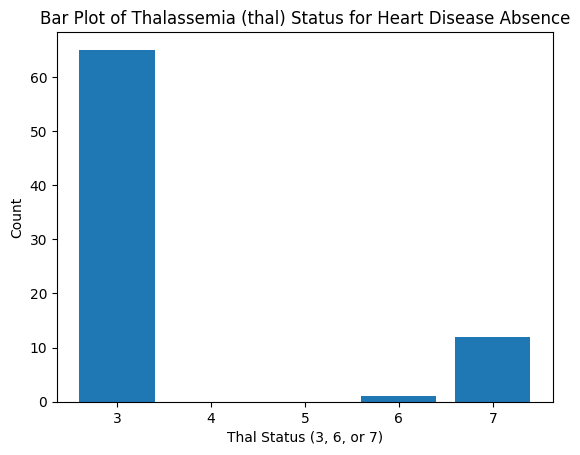

In [ ]:
plt.bar(thal_disease_absent.keys(), thal_disease_absent.values())
plt.xlabel('Thal Status (3, 6, or 7)')
plt.ylabel('Count')
plt.title('Bar Plot of Thalassemia (thal) Status for Heart Disease Absence')
plt.show()

<BarContainer object of 3 artists>

Text(0.5, 0, 'Thal Status (3, 6, or 7)')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bar Plot of Thalassemia (thal) Status for Heart Disease Presence')

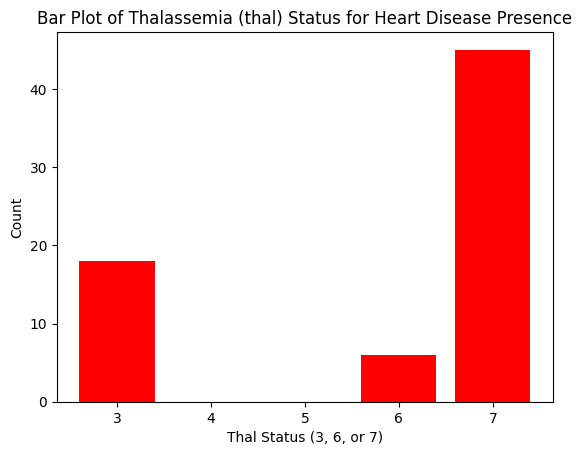

In [ ]:
plt.bar(thal_disease_present.keys(), thal_disease_present.values(), color = 'red')
plt.xlabel('Thal Status (3, 6, or 7)')
plt.ylabel('Count')
plt.title('Bar Plot of Thalassemia (thal) Status for Heart Disease Presence')
plt.show()